In [92]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import sqlalchemy as db
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *

pd.set_option('display.max_rows', 500)

In [57]:
load_dotenv()

# config and credentials
server = os.getenv('server')
database = os.getenv('database')
username = os.getenv('username')
password = os.getenv('password')

# connection
engine = db.create_engine(
    'mssql://{}:{}@{}/{}?driver=ODBC+Driver+18+for+SQL+Server'.format(
        username, password, server, database
    )
)

# establish connection
connection = engine.connect()

In [58]:
query = 'SELECT * FROM BondReturns'

# df = pd.read_sql(query, connection)
# df.to_csv('data/output/bondReturns.csv', index=False)

df = pd.read_csv('data/output/bondReturns.csv')
df['LtTrdExctnDt'] = pd.to_datetime(df['LtTrdExctnDt'])

In [97]:
df[df['CusipId'] == '194832AD3']

,LtTrdExctnDt,CusipId,RptdPr,LagRptdPr,Coupon,InterestFrequency,T,D,AccruedInterest,LagAccruedInterest,R,R_new,logR
274081,2002-10-31,194832AD3,92.750000,NaN,11.0,2,180,60,1.833333,NaN,NaN,0.000000,0.000000
274082,2002-11-26,194832AD3,96.000000,92.750000,11.0,2,180,35,1.069444,1.833333,0.142584,0.084435,0.081059
274083,2003-01-31,194832AD3,93.850000,96.000000,11.0,2,180,30,0.916667,1.069444,0.089598,0.032937,0.032407
274084,2003-02-27,194832AD3,97.883929,93.850000,11.0,2,180,56,1.711111,0.916667,0.167025,0.108987,0.103447
274085,2003-03-27,194832AD3,97.387500,97.883929,11.0,2,180,86,2.627778,1.711111,0.114667,0.059443,0.057743
274086,2003-04-30,194832AD3,102.937500,97.387500,11.0,2,180,120,3.666667,2.627778,0.175862,0.120870,0.114106
274087,2003-05-29,194832AD3,86.312500,102.937500,11.0,2,180,148,4.522222,3.666667,-0.044740,-0.096332,-0.101294
274088,2003-06-30,194832AD3,88.000000,86.312500,11.0,2,180,0,0.000000,4.522222,0.089892,0.029342,0.028920
274089,2003-07-31,194832AD3,94.708667,88.000000,11.0,2,180,30,0.916667,0.000000,0.211652,0.149152,0.139024
274090,2003-08-28,194832AD3,86.833333,94.708667,11.0,2,180,58,1.772222,0.916667,0.041623,-0.015893,-0.016021


In [98]:
df.head()

,LtTrdExctnDt,CusipId,RptdPr,LagRptdPr,Coupon,InterestFrequency,T,D,AccruedInterest,LagAccruedInterest,R,R_new,logR
0,2002-07-26,000325AA8,100.625,NaN,9.0,2,180,167,4.175000,NaN,NaN,0.000000,0.000000
1,2002-08-30,000336AE7,97.693,NaN,7.0,2,180,93,1.808333,NaN,NaN,0.000000,0.000000
2,2002-09-30,000336AE7,93.155,97.693,7.0,2,180,123,2.391667,1.808333,0.030606,-0.004569,-0.004580
3,2002-10-31,000336AE7,96.000,93.155,7.0,2,180,153,2.975000,2.391667,0.109144,0.072513,0.070004
4,2002-11-27,000336AE7,103.431,96.000,7.0,2,180,0,0.000000,2.975000,0.115746,0.080384,0.077316


In [60]:
df['R_new'] = df['R_new'].fillna(0)

In [61]:
df.head()

,LtTrdExctnDt,CusipId,RptdPr,LagRptdPr,Coupon,InterestFrequency,T,D,AccruedInterest,LagAccruedInterest,R,R_new
0,2002-07-26,000325AA8,100.625,NaN,9.0,2,180,167,4.175000,NaN,NaN,0.000000
1,2002-08-30,000336AE7,97.693,NaN,7.0,2,180,93,1.808333,NaN,NaN,0.000000
2,2002-09-30,000336AE7,93.155,97.693,7.0,2,180,123,2.391667,1.808333,0.030606,-0.004569
3,2002-10-31,000336AE7,96.000,93.155,7.0,2,180,153,2.975000,2.391667,0.109144,0.072513
4,2002-11-27,000336AE7,103.431,96.000,7.0,2,180,0,0.000000,2.975000,0.115746,0.080384


In [62]:
df['logR'] = np.log(1 + df['R_new'])

In [63]:
df.head()

,LtTrdExctnDt,CusipId,RptdPr,LagRptdPr,Coupon,InterestFrequency,T,D,AccruedInterest,LagAccruedInterest,R,R_new,logR
0,2002-07-26,000325AA8,100.625,NaN,9.0,2,180,167,4.175000,NaN,NaN,0.000000,0.000000
1,2002-08-30,000336AE7,97.693,NaN,7.0,2,180,93,1.808333,NaN,NaN,0.000000,0.000000
2,2002-09-30,000336AE7,93.155,97.693,7.0,2,180,123,2.391667,1.808333,0.030606,-0.004569,-0.004580
3,2002-10-31,000336AE7,96.000,93.155,7.0,2,180,153,2.975000,2.391667,0.109144,0.072513,0.070004
4,2002-11-27,000336AE7,103.431,96.000,7.0,2,180,0,0.000000,2.975000,0.115746,0.080384,0.077316


In [64]:
J = 6 # formation period

df_ = df[
    ['CusipId', 'LtTrdExctnDt', 'R_new', 'logR']
].sort_values(['CusipId', 'LtTrdExctnDt']).set_index('LtTrdExctnDt')

cumr = df_.groupby(['CusipId'])['logR'].rolling(J, min_periods=J).sum().reset_index()
cumr = cumr.rename(columns = {'logR': 'SumLogR'})

cumr['CumRet'] = np.exp(cumr['SumLogR'])-1

In [65]:
cumr.tail(10)

,CusipId,LtTrdExctnDt,SumLogR,CumRet
1102054,989822AA9,2022-05-31,0.138671,0.148746
1102055,989822AA9,2022-06-30,0.140737,0.151122
1102056,989822AA9,2022-07-29,0.148491,0.160083
1102057,989822AA9,2022-08-31,0.152837,0.165135
1102058,989822AA9,2022-09-30,0.161279,0.175013
1102059,G65422AA8,2012-06-29,NaN,NaN
1102060,G65422AA8,2012-07-27,NaN,NaN
1102061,G65422AA8,2012-08-30,NaN,NaN
1102062,G65422AA8,2012-09-28,NaN,NaN
1102063,G65422AA8,2013-01-29,NaN,NaN


In [66]:
r = 10 # momentum ranking

cumr = cumr.dropna(axis=0, subset=['CumRet'])

cumr['MomR'] = cumr.groupby('LtTrdExctnDt')['CumRet'].transform(lambda x: pd.qcut(x, r, labels=False))
cumr['MomR'] = 1 + cumr['MomR'].astype(int)

In [67]:
cumr.head()

,CusipId,LtTrdExctnDt,SumLogR,CumRet,MomR
6,000336AE7,2003-03-31,0.085839,0.089630,1
7,000336AE7,2003-04-29,0.163474,0.177595,2
8,000336AE7,2003-07-29,0.257766,0.294036,7
9,000336AE7,2003-08-26,0.213192,0.237623,6
10,000336AE7,2003-10-27,0.192088,0.211778,5


In [68]:
cumr.groupby('MomR')['CumRet'].mean()

MomR
1     0.017592
2     0.080654
3     0.104622
4     0.123074
5     0.140008
6     0.157518
7     0.177620
8     0.202890
9     0.241181
10    3.582795
Name: CumRet, dtype: float64

In [69]:
K = 6 # Holding Period Length: K can be between 3 to 12 months

cumr['form_date'] = cumr['LtTrdExctnDt']
cumr['medate'] = cumr['LtTrdExctnDt'] + MonthEnd(0)
cumr['hdate1'] = cumr['medate'] + MonthBegin(1)
cumr['hdate2'] = cumr['medate'] + MonthEnd(K)
cumr = cumr[['CusipId', 'form_date','MomR','hdate1','hdate2']]

In [70]:
cumr.head()

,CusipId,form_date,MomR,hdate1,hdate2
6,000336AE7,2003-03-31,1,2003-04-01,2003-09-30
7,000336AE7,2003-04-29,2,2003-05-01,2003-10-31
8,000336AE7,2003-07-29,7,2003-08-01,2004-01-31
9,000336AE7,2003-08-26,6,2003-09-01,2004-02-29
10,000336AE7,2003-10-27,5,2003-11-01,2004-04-30


In [71]:
port = pd.merge(df[['CusipId', 'LtTrdExctnDt', 'R_new']], cumr, on=['CusipId'], how='inner')
port = port[(port['hdate1'] <= port['LtTrdExctnDt']) & (port['LtTrdExctnDt'] <= port['hdate2'])]

port = port[['CusipId','form_date', 'MomR', 'hdate1','hdate2', 'LtTrdExctnDt', 'R_new']]

In [72]:
port.head()

,CusipId,form_date,MomR,hdate1,hdate2,LtTrdExctnDt,R_new
150,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-04-29,0.080729
175,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-07-29,0.093859
176,000336AE7,2003-04-29,2,2003-05-01,2003-10-31,2003-07-29,0.093859
200,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-08-26,0.025757
201,000336AE7,2003-04-29,2,2003-05-01,2003-10-31,2003-08-26,0.025757


In [73]:
port['LtTrdExctnDt'] = pd.to_datetime(port['LtTrdExctnDt'])

In [74]:
port.head()

,CusipId,form_date,MomR,hdate1,hdate2,LtTrdExctnDt,R_new
150,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-04-29,0.080729
175,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-07-29,0.093859
176,000336AE7,2003-04-29,2,2003-05-01,2003-10-31,2003-07-29,0.093859
200,000336AE7,2003-03-31,1,2003-04-01,2003-09-30,2003-08-26,0.025757
201,000336AE7,2003-04-29,2,2003-05-01,2003-10-31,2003-08-26,0.025757


In [75]:
cumr_port = port.groupby(['LtTrdExctnDt','MomR', 'form_date'])['R_new'].mean().reset_index()

start_yr = cumr_port['LtTrdExctnDt'].dt.year.min()+2
cumr_port = cumr_port.loc[cumr_port.LtTrdExctnDt.dt.year >= start_yr]
cumr_port = cumr_port.sort_values(by=['LtTrdExctnDt','MomR'])

In [76]:
cumr_port.head()

,LtTrdExctnDt,MomR,form_date,R_new
20668,2005-01-26,1,2004-07-26,0.015450
20669,2005-01-26,1,2004-07-27,0.014012
20670,2005-01-26,1,2004-07-28,0.009272
20671,2005-01-26,1,2004-07-29,0.009802
20672,2005-01-26,1,2004-07-30,-0.001453


In [77]:
ewret = cumr_port.groupby(['LtTrdExctnDt','MomR'])['R_new'].mean().reset_index()
ewstd = cumr_port.groupby(['LtTrdExctnDt','MomR'])['R_new'].std().reset_index()

ewret = ewret.rename(columns={'R_new':'ewret'})
ewstd = ewstd.rename(columns={'R_new':'ewretstd'})

ewretdf = pd.merge(ewret, ewstd, on=['LtTrdExctnDt','MomR'], how='inner')
ewretdf = ewretdf.sort_values(by=['MomR', 'LtTrdExctnDt'])

In [78]:
ewretdf.head()

,LtTrdExctnDt,MomR,ewret,ewretstd
0,2005-01-26,1,0.011409,0.008432
10,2005-01-27,1,0.012694,0.013219
20,2005-01-28,1,0.011012,0.009733
30,2005-01-31,1,0.014879,0.006854
40,2005-02-23,1,0.011967,0.016332


In [79]:
ewretdf.groupby(['MomR'])['ewret'].describe()[['count','mean', 'std']].reset_index()

,MomR,count,mean,std
0,1,882.0,0.033886,0.075779
1,2,882.0,0.022355,0.026105
2,3,882.0,0.023098,0.021091
3,4,882.0,0.023827,0.018827
4,5,882.0,0.024818,0.017626
5,6,882.0,0.025787,0.018064
6,7,882.0,0.026879,0.018107
7,8,882.0,0.028205,0.018809
8,9,882.0,0.029606,0.019888
9,10,882.0,0.053881,0.069222


In [80]:
ewret_t = ewretdf.pivot(index='LtTrdExctnDt', columns='MomR', values='ewret') 

# Add prefix port in front of each column 
ewret_t = ewret_t.add_prefix('port') 
ewret_t = ewret_t.rename(columns={'port1':'losers', 'port10':'winners'}) 
ewret_t['long_short'] = ewret_t.winners - ewret_t.losers

In [81]:
ewret_t.head()

MomR,losers,port2,port3,port4,port5,port6,port7,port8,port9,winners,long_short
LtTrdExctnDt,,,,,,,,,,,
2005-01-26,0.011409,0.025854,0.028597,0.033884,0.034428,0.028010,0.035318,0.039539,0.039566,0.047793,0.036384
2005-01-27,0.012694,0.028842,0.030160,0.030608,0.029725,0.035365,0.039923,0.037887,0.038150,0.129471,0.116778
2005-01-28,0.011012,0.029303,0.031492,0.031015,0.035409,0.035808,0.036914,0.034143,0.037795,0.029734,0.018722
2005-01-31,0.014879,0.026853,0.027761,0.029026,0.031660,0.032311,0.037126,0.037657,0.042244,0.065072,0.050193
2005-02-23,0.011967,0.026832,0.028683,0.027947,0.029304,0.023613,0.023503,0.032180,0.030534,0.075109,0.063141


In [82]:
ewret_t['cumret_winners'] = (1 + ewret_t.winners).cumprod()-1 
ewret_t['cumret_losers'] = (1 + ewret_t.losers).cumprod()-1
ewret_t['cumret_long_short'] = (1 + ewret_t.long_short).cumprod()-1

In [83]:
mom_mean = ewret_t[['winners', 'losers', 'long_short']].mean().to_frame() 
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index() 
mom_mean

,MomR,mean
0,winners,0.053881
1,losers,0.033886
2,long_short,0.019996


In [84]:
t_losers = pd.Series(stats.ttest_1samp(ewret_t['losers'],0.0)).to_frame().T 
t_winners = pd.Series(stats.ttest_1samp(ewret_t['winners'],0.0)).to_frame().T 
t_long_short = pd.Series(stats.ttest_1samp(ewret_t['long_short'],0.0)).to_frame().T

t_losers['MomR']='losers' 
t_winners['MomR']='winners' 
t_long_short['MomR']='long_short'

In [85]:
t_output =pd.concat([t_winners, t_losers, t_long_short]).rename(columns={0:'t-stat', 1:'p-value'}) 

# Combine mean, t and p and format output 
mom_output = pd.merge(mom_mean, t_output, on=['MomR'], how='inner')

mom_output['mean'] = mom_output['mean'].map('{:.2%}'.format) 
mom_output['t-stat'] = mom_output['t-stat'].map('{:.2f}'.format) 
mom_output['p-value'] = mom_output['p-value'].map('{:.2f}'.format) 

print('Momentum Strategy Summary:\n\n', mom_output)

Momentum Strategy Summary:

          MomR   mean t-stat p-value
0     winners  5.39%  23.12    0.00
1      losers  3.39%  13.28    0.00
2  long_short  2.00%   6.70    0.00


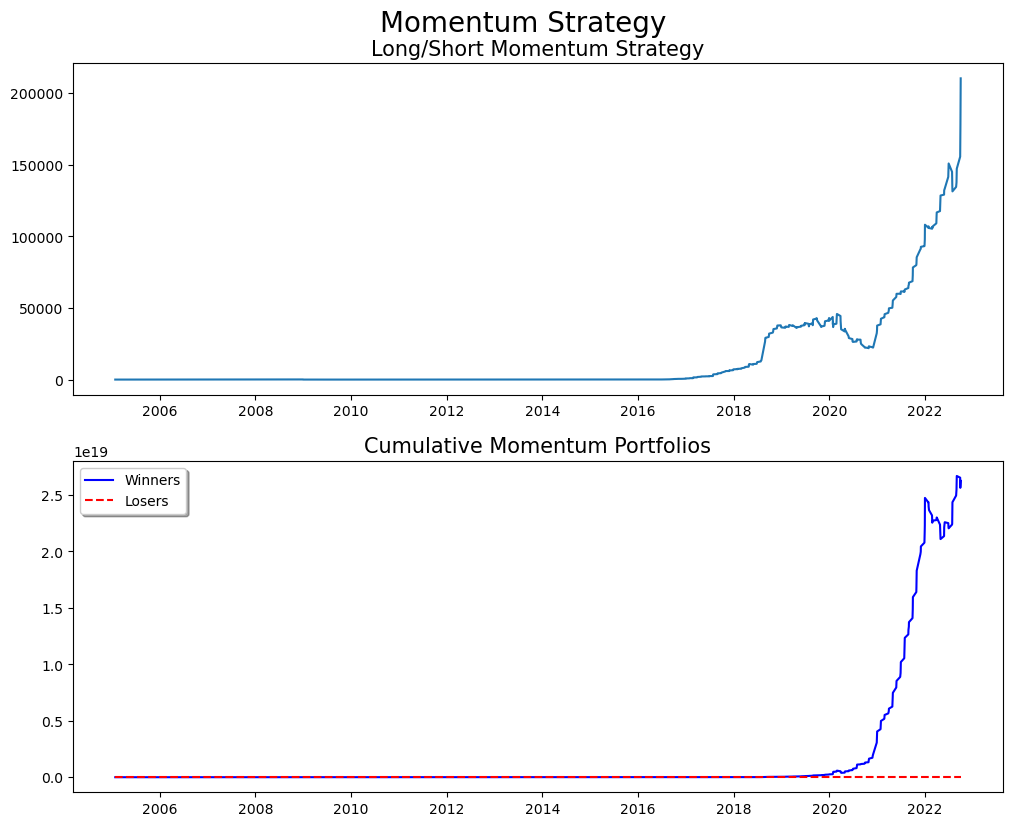

In [86]:
plt.figure(figsize=(12,9)) 
plt.suptitle('Momentum Strategy', fontsize=20) 

ax1 = plt.subplot(211) 
ax1.set_title('Long/Short Momentum Strategy', fontsize=15) 
ax1.plot(ewret_t['cumret_long_short']) 

ax2 = plt.subplot(212) 
ax2.set_title('Cumulative Momentum Portfolios', fontsize=15) 
ax2.plot(ewret_t['cumret_winners'], 'b-', ewret_t['cumret_losers'], 'r--') 
ax2.legend(('Winners','Losers'), loc='upper left', shadow=True) 

plt.subplots_adjust(top=0.92, hspace=0.2)